# Description of the module

If you run a virtual envirement, you can install the requirements with the following command

In [1]:
#!pip install -r requirements.txt

Let's load the [library](./pyprettyplot/) that contain some useful setup and function, and set the style of the plot followin what is described in the [style](../IllustratorsStyles/README.md) section. In summary it will plot (all scaled by ×2 for notebook display): 
1. Axis with linewidth of 0.5 pt with color #2E3440
2. Tick with linewidth of 0.5 pt with color #2E3440, and length of 2pt
3. No top and right spines
4. Tick labels using Decima 7pt
5. Axis title labels using Aktiv Grotesk Condensed Regular 8pt
6. Cycling colorpalette using the Nord theme #356BA0, #D18F98, #499E4B, #7181A3, #844A84, #7181A3, #BC394C

*Note that pandas, numpy, and plotly are already loaded

In [2]:
from pyprettyplot import * 
if True: # Static render for github
    pio.renderers.default = "jpg"
    pio.kaleido.scope.default_scale = 2
else: #interactive render for vscode
    pio.renderers.default = "vscode"

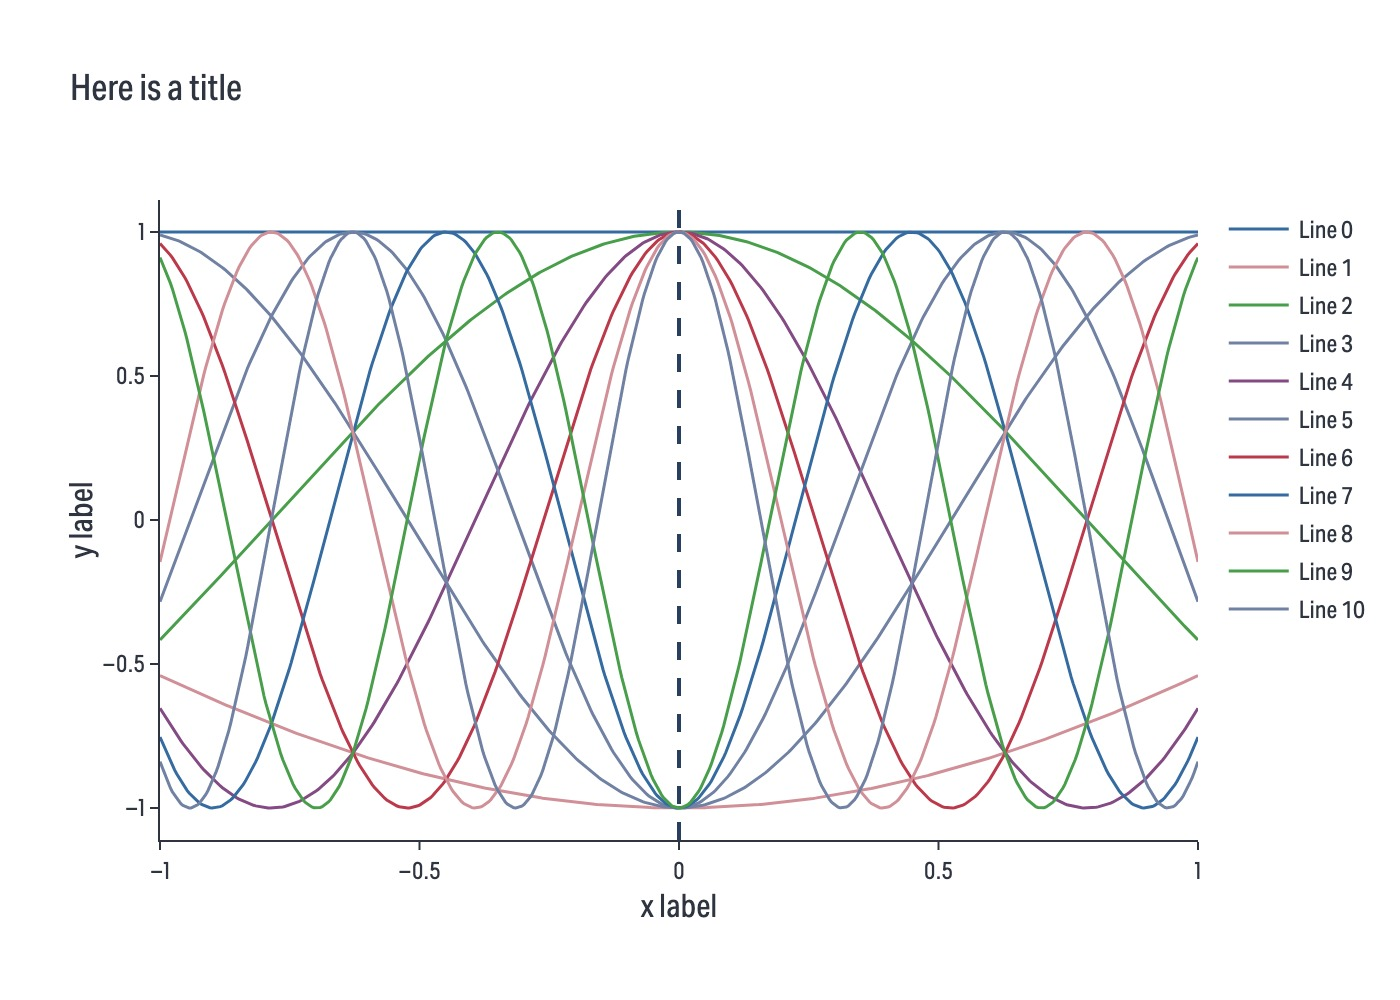

In [3]:
fig = go.Figure()
tr = []
x = np.linspace(-1,1, 500)
for ii in range(10+1):
    tr += [go.Scatter(x=x, y=np.cos(x*ii + np.pi*ii), mode='lines', name=f'Line {ii}')]
fig.add_traces(tr)
fig.add_vline(x=0, line_dash='dash')
fig.update_xaxes(title = 'x label')
fig.update_yaxes(title = 'y label')
fig.update_layout(title = 'Here is a title')

fig.show()

# Complete Example in the Wild

Although this example will use the python module based on the plotly graphic display, the tips that will be discussed can be applied for any ploting software or library.

This example is based on dataset that are published in [Shandilya et al "All-optical azimuthal trapping of dissipative Kerr multi-solitons for relative noise suppression" APL Photonics 10, 016104 (2025)](https://pubs.aip.org/aip/app/article/10/1/016104/3330155)


Let's first load the data into a pandas dataframe

In [4]:
df_KIS = pd.read_csv('./ExampleDataSet/Spectrum_EXP_RW850G600_KIS_2DKS.csv')
df_noKIS = pd.read_csv('./ExampleDataSet/Spectrum_EXP_RW850G600_noKIS_2DKS.csv')
df_KISsim = pd.read_csv('./ExampleDataSet/Sepctrum_SIM_2DKS_KIS.csv')
df_noKISsim = pd.read_csv('./ExampleDataSet/Sepctrum_SIM_2DKS_noKIS.csv')

Now what is important is to **only** display what we want in the final figure. It can of course be trimmed in Adobe Illustraotr (as explained here), but it will end up saving you time doing it now. Hence we will mask the dataset to only display what we want: 

In [5]:
noise_floor = -78 #dBm

mask_mu = lambda x: np.logical_and(x.mu>-104, x.mu<123)
mask_S = lambda x: x.S<noise_floor

df_KIS  = df_KIS[mask_mu(df_KIS)]
df_noKIS = df_noKIS[mask_mu(df_noKIS)]

df_KISsim = df_KISsim[mask_mu(df_KISsim)]
df_noKISsim = df_noKISsim[mask_mu(df_noKISsim)]

df_KIS.S[mask_S(df_KIS)] = noise_floor
df_noKIS.S[mask_S(df_noKIS)] = noise_floor

df_KISsim.S[mask_S(df_KISsim)] = noise_floor
df_noKISsim.S[mask_S(df_noKISsim)] = noise_floor

Cool, let's plot it now

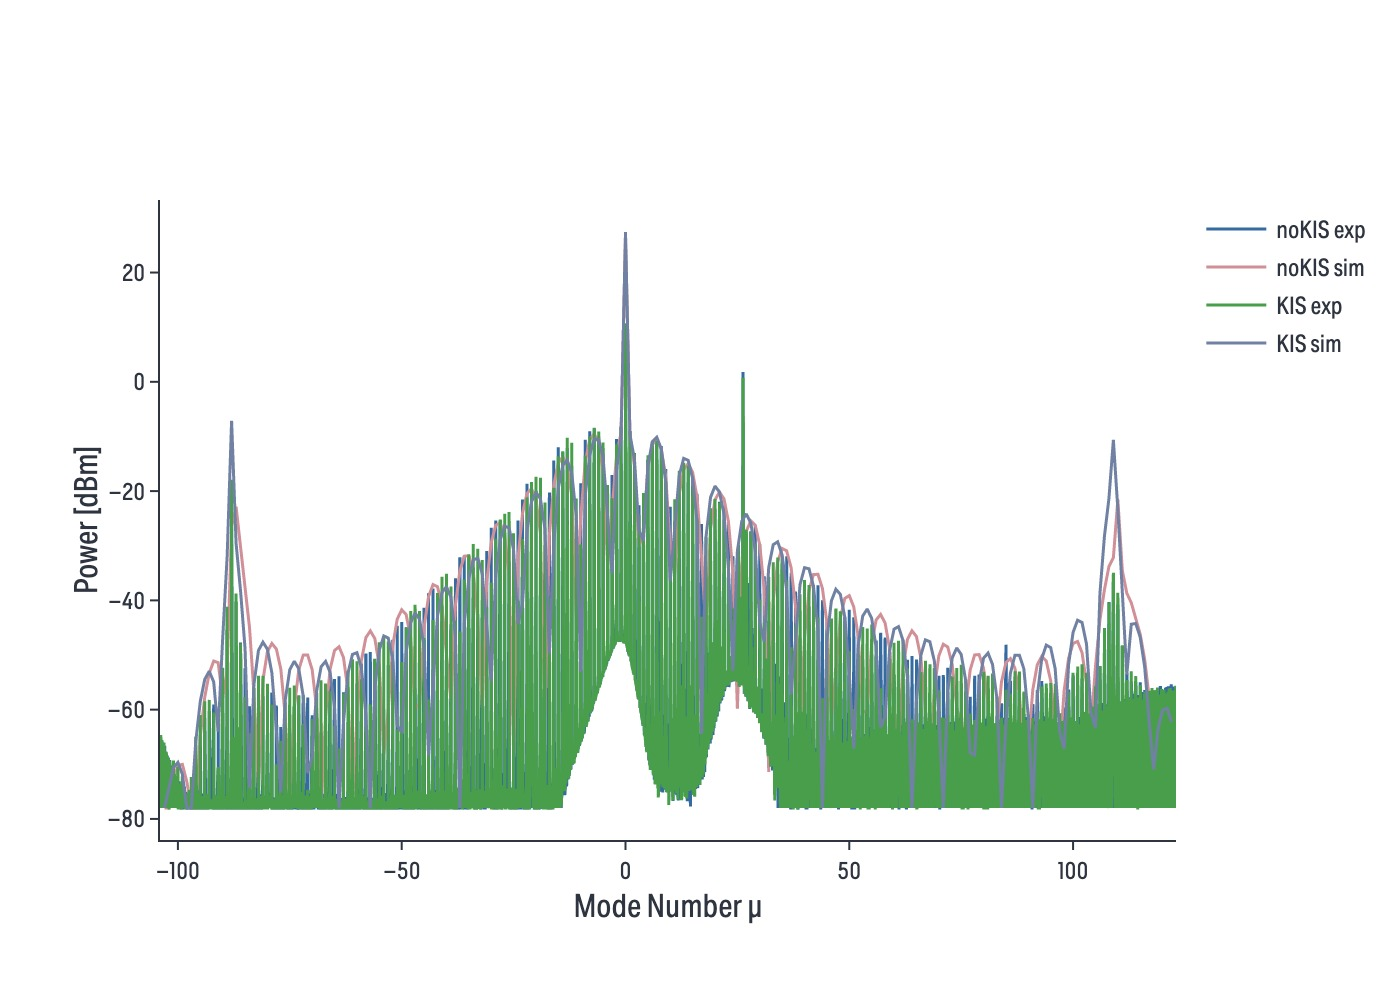

In [6]:
fig_firstshot = go.Figure()
tr = [go.Scatter(x=df_noKIS.mu, y=df_noKIS.S, name="noKIS exp")]
tr += [go.Scatter(x=df_noKISsim.mu, y=df_noKISsim.S, name="noKIS sim")]
tr += [go.Scatter(x=df_KIS.mu, y=df_KIS.S, name="KIS exp")]
tr += [go.Scatter(x=df_KISsim.mu, y=df_KISsim.S, name="KIS sim")]
fig_firstshot.add_traces(tr)

fig_firstshot.update_xaxes(title='Mode Number µ')
fig_firstshot.update_yaxes(title="Power [dBm]")
fig_firstshot.show()

Clearly, this is not a pretty plot. Let's make it pretty. As explain in the [Basic Graphic Design section](../README.md#basic-graphic-dezzsign), we need to follow _clarity_, _simplicity_, and _consistency_.
1. **Clarity**: The spectra overalaping make the plot hard to read. We can offset them from one another to make them more readable
2. **Simplicity**: The plot is already simple, but we could remove the grid and the legend to make it even simpler.
3. **Consistency**: Since we have simulation and experiment, and unsynchronized and synchronizated, we should make sure that they easily identifiable

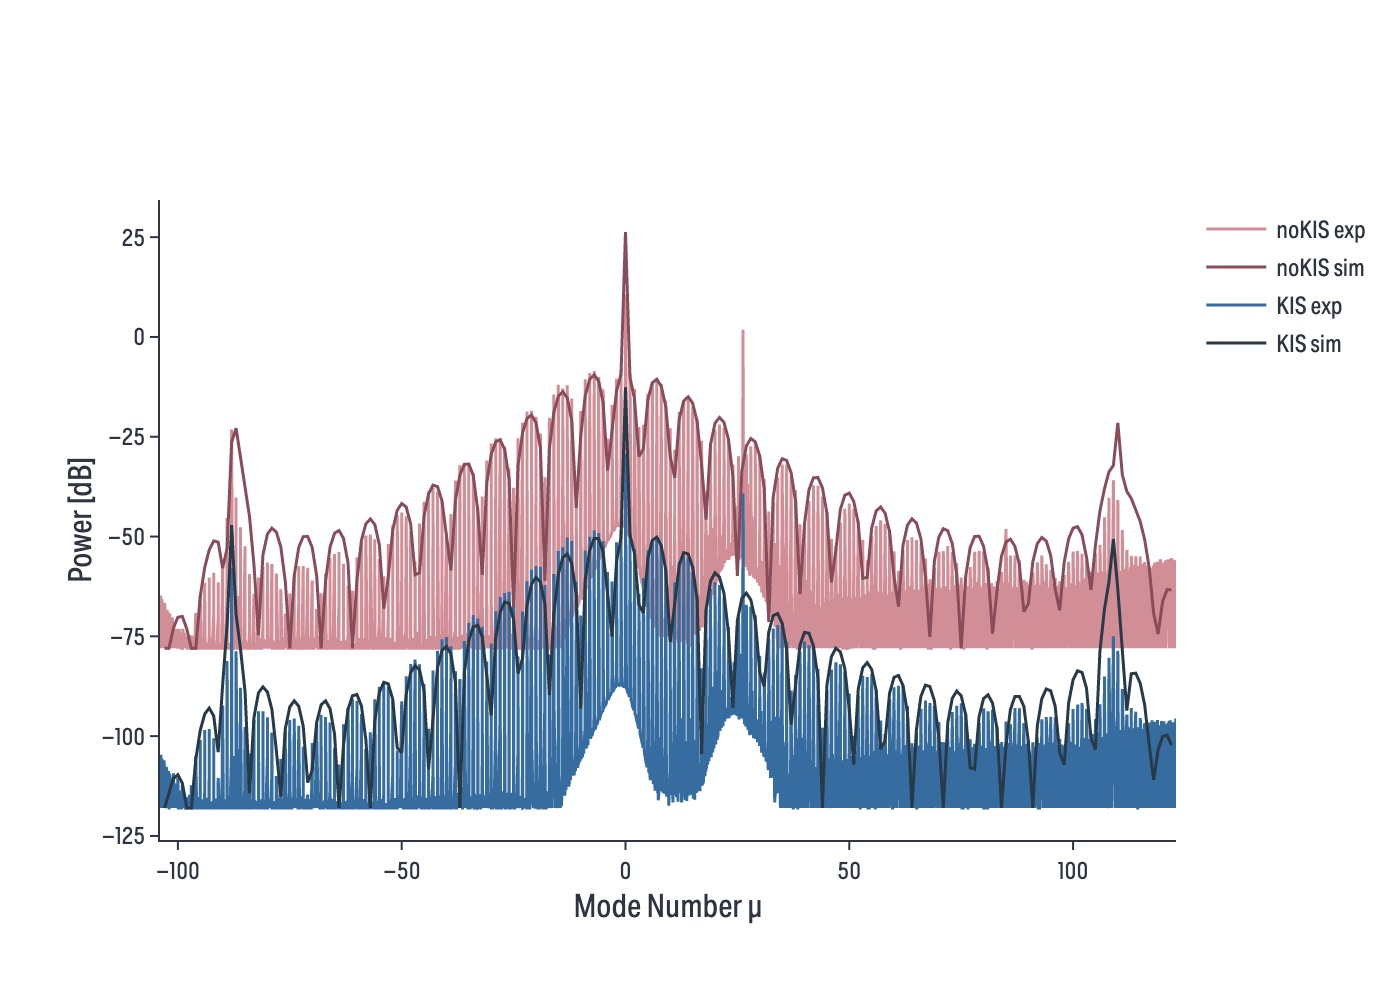

In [7]:
fig = go.Figure()

offset = 40
clr_KISsim = "#283947"
clr_KISexp = "#366CA0"
clr_noKISsim = "#884C5A"
clr_noKISexp = "#D18E97"

tr = [go.Scatter(x=df_noKIS.mu, y=df_noKIS.S, line_color=clr_noKISexp, name="noKIS exp")]
tr += [go.Scatter(x=df_noKISsim.mu, y=df_noKISsim.S, line_color=clr_noKISsim, name="noKIS sim")]
tr += [go.Scatter(x=df_KIS.mu, y=df_KIS.S - offset, line_color=clr_KISexp, name="KIS exp")]
tr += [go.Scatter(x=df_KISsim.mu, y=df_KISsim.S - offset, line_color=clr_KISsim, name="KIS sim")]

fig.add_traces(tr)

fig.update_xaxes(title='Mode Number µ')
fig.update_yaxes(title="Power [dB]", dtick=25)
fig.show()

One may say that it is actally less clear now, isn't it? Mostly becasue the two spectra overlap make it not very clear to see things. 

One trick that is quite conveninet is to create a white background behind the spectra. This will make the spectra more readable. One may do it in Illustrator (as explained), or directly in the plot:

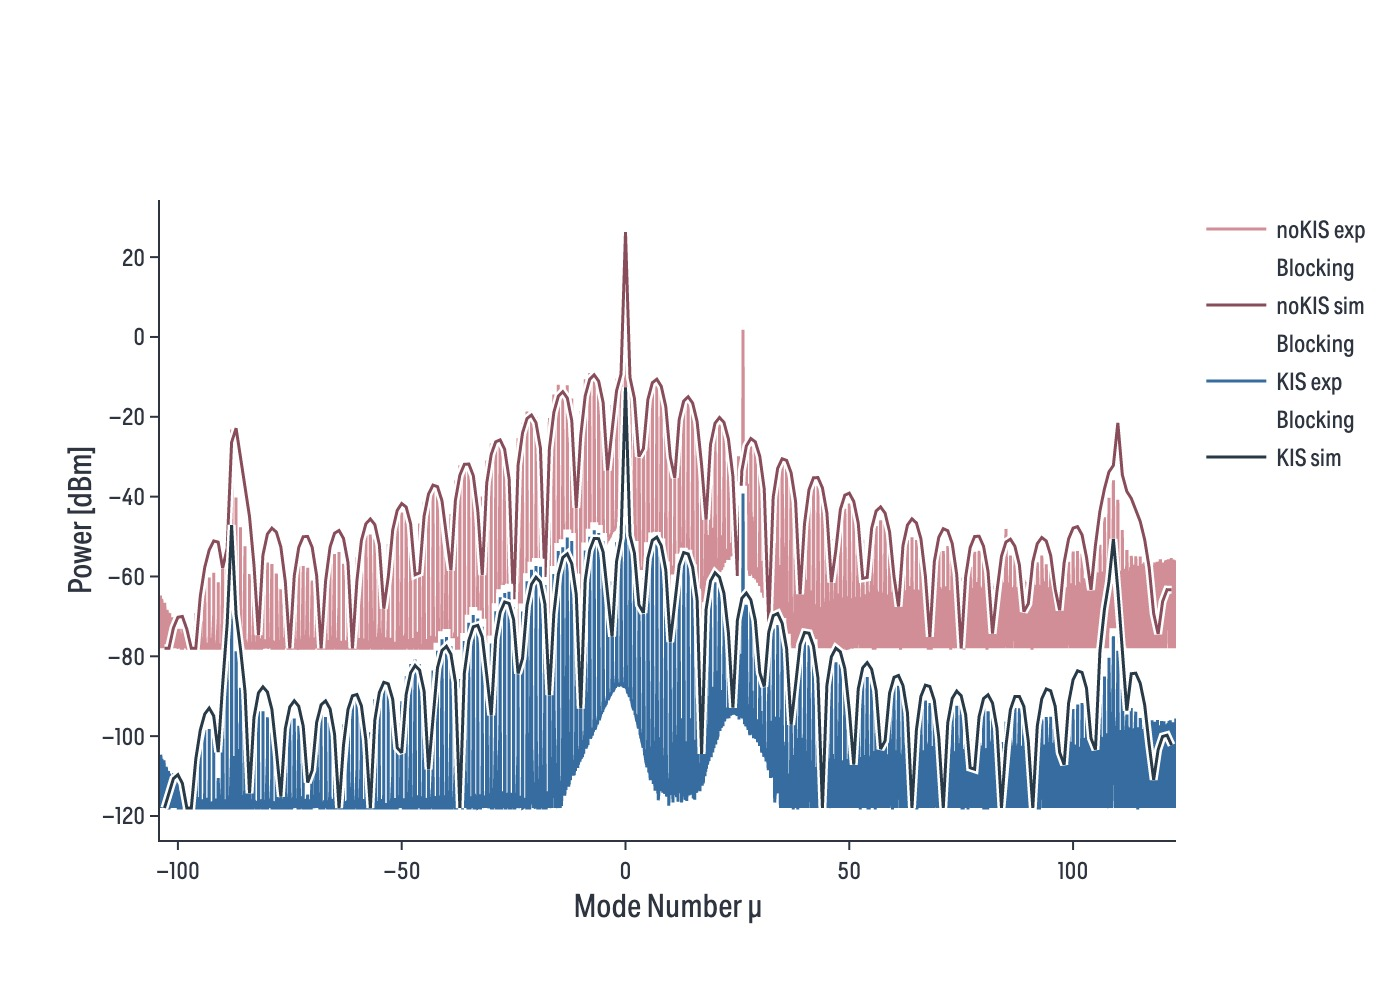

In [8]:
fig = go.Figure()

offset = 40
clr_KISsim = "#283947"
clr_KISexp = "#366CA0"
clr_noKISsim = "#884C5A"
clr_noKISexp = "#D18E97"

tr = [go.Scatter(x=df_noKIS.mu, y=df_noKIS.S, line_color=clr_noKISexp, name="noKIS exp")]
## adding the white blocking region
tr += [go.Scatter(x=df_noKISsim.mu, y=df_noKISsim.S, line_color="white", line_width = 4, name="Blocking")]
tr += [go.Scatter(x=df_noKISsim.mu, y=df_noKISsim.S, line_color=clr_noKISsim, name="noKIS sim")]

## adding the white blocking region
tr += [go.Scatter(x=df_KIS.mu, y=df_KIS.S - offset + 2, line_color="white", line_width = 4, name="Blocking")]
tr += [go.Scatter(x=df_KIS.mu, y=df_KIS.S - offset, line_color=clr_KISexp, name="KIS exp")]
## adding the white blocking region
tr += [go.Scatter(x=df_KISsim.mu, y=df_KISsim.S - offset, line_color="white", line_width = 4, name="Blocking")]
tr += [go.Scatter(x=df_KISsim.mu, y=df_KISsim.S - offset, line_color=clr_KISsim, name="KIS sim")]



fig.add_traces(tr)
fig.update_xaxes(title='Mode Number µ')
fig.update_yaxes(title='Power [dBm]')
fig.show()

Looking better? We can still improve, in particuarly the **clarity**.

All publication figure (or subplots) must convey **a single message**, which must be the goal of the design. In the example chosen, the message is that there is a change of the spectrum patter between the synchronizaed and unsynchronized case. When the spectra were overlapping it was pretty obvious. However, offseting them for clarity had weaken the goal of the plot. We must fix this issue, since **a pretty figure is always worse than a clear figure**

A solution is to introduce an offset which makes the change of pattern more obvious. 




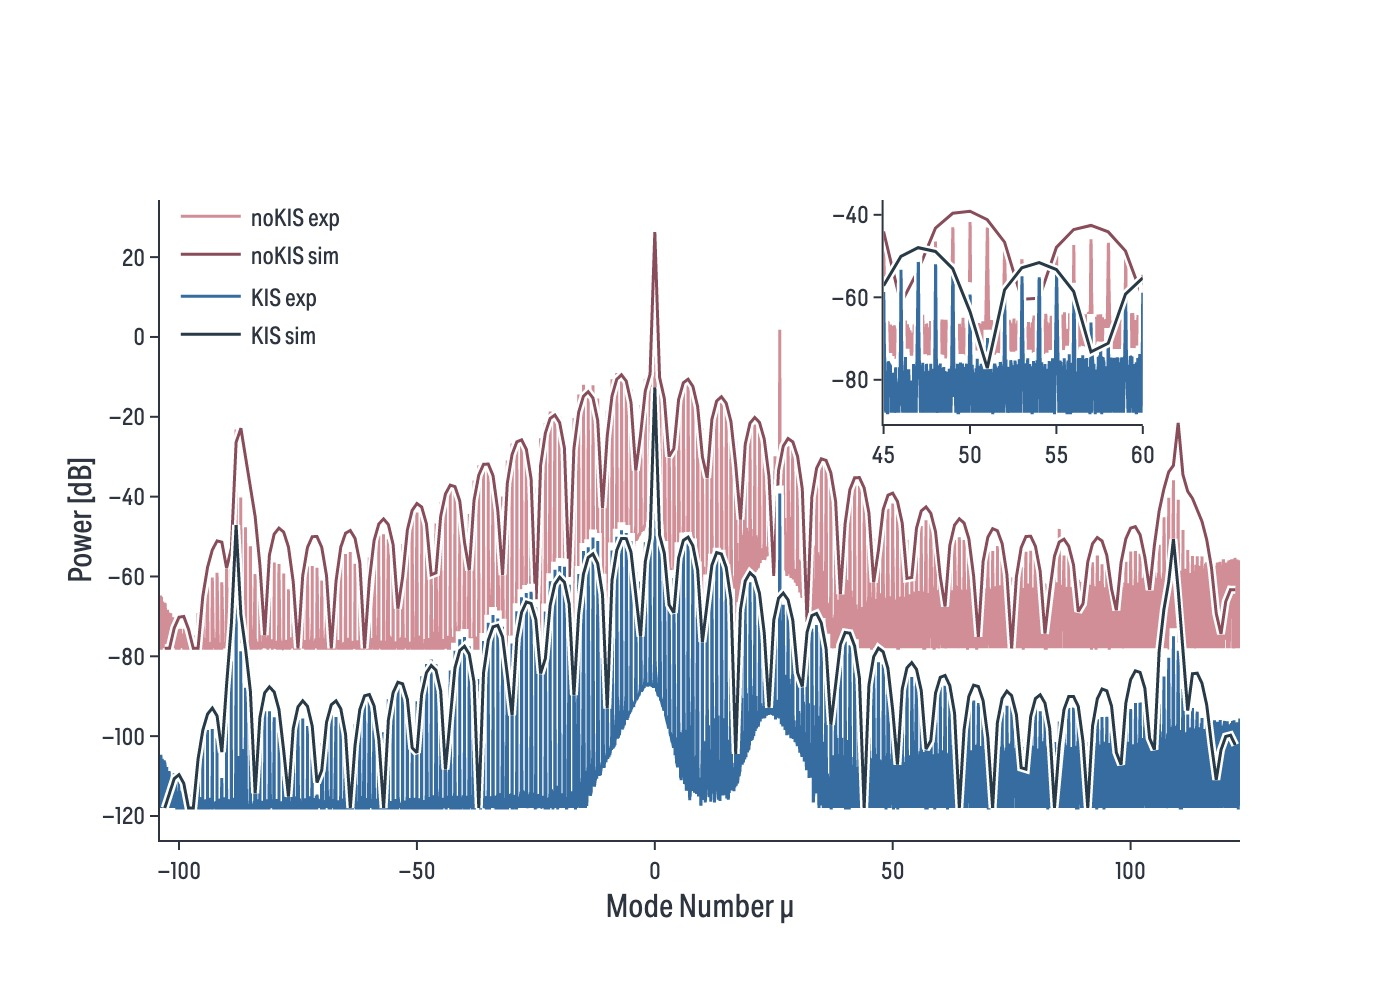

In [9]:
fig = go.Figure()

offset = 40
clr_KISsim = "#283947"
clr_KISexp = "#366CA0"
clr_noKISsim = "#884C5A"
clr_noKISexp = "#D18E97"

tr = [go.Scatter(x=df_noKIS.mu, y=df_noKIS.S, line_color=clr_noKISexp, name="noKIS exp", legendgroup = "noKIS")]
## adding the white blocking region
tr += [go.Scatter(x=df_noKISsim.mu, y=df_noKISsim.S, line_color="white", line_width = 4, name="Blocking", showlegend = False, legendgroup = "noKIS")]
tr += [go.Scatter(x=df_noKISsim.mu, y=df_noKISsim.S, line_color=clr_noKISsim, name="noKIS sim", legendgroup = "noKIS")]
## adding the white blocking region
tr += [go.Scatter(x=df_KIS.mu, y=df_KIS.S - offset + 2, line_color="white", line_width = 4, name="Blocking", showlegend = False, legendgroup = "KIS")]
tr += [go.Scatter(x=df_KIS.mu, y=df_KIS.S - offset, line_color=clr_KISexp, name="KIS exp", legendgroup = "KIS")]
## adding the white blocking region
tr += [go.Scatter(x=df_KISsim.mu, y=df_KISsim.S - offset, line_color="white", line_width = 4, name="Blocking", showlegend = False, legendgroup = "KIS")]
tr += [go.Scatter(x=df_KISsim.mu, y=df_KISsim.S - offset, line_color=clr_KISsim, name="KIS sim", legendgroup = "KIS")]

fig.add_traces(tr)
fig.update_xaxes(title='Mode Number µ')
fig.update_yaxes(title='Power [dB]')
fig.update_layout(legend = dict(
    yanchor="top",
    y=1.02,
    xanchor="left",
    x=0.01,
))

## Adding the inset
mz = lambda x: np.logical_and(x.mu>=45, x.mu<=60)
par = dict(showlegend = False, xaxis = "x2", yaxis = "y2", mode= 'lines')
trzoom = [go.Scatter(x=df_noKIS[mz(df_noKIS)].mu, y=df_noKIS[mz(df_noKIS)].S, line_color=clr_noKISexp, legendgroup = "noKIS", **par)]
## adding the white blocking region
trzoom += [go.Scatter(x=df_noKISsim[mz(df_noKISsim)].mu, y=df_noKISsim[mz(df_noKISsim)].S, line_color="white", line_width = 4, legendgroup = "noKIS", **par)]
trzoom += [go.Scatter(x=df_noKISsim[mz(df_noKISsim)].mu, y=df_noKISsim[mz(df_noKISsim)].S, line_color=clr_noKISsim, legendgroup = "noKIS", **par)]
## adding the white blocking region
trzoom += [go.Scatter(x=df_KIS[mz(df_KIS)].mu, y=df_KIS[mz(df_KIS)].S - 10 + 2, line_color="white", line_width = 4, legendgroup = "KIS", **par)]
trzoom += [go.Scatter(x=df_KIS[mz(df_KIS)].mu, y=df_KIS[mz(df_KIS)].S - 10, line_color=clr_KISexp, legendgroup = "KIS", **par)]
## adding the white blocking region
trzoom += [go.Scatter(x=df_KISsim[mz(df_KISsim)].mu, y=df_KISsim[mz(df_KISsim)].S - 10, line_color="white", line_width = 4, legendgroup = "KIS", **par)]
trzoom += [go.Scatter(x=df_KISsim[mz(df_KISsim)].mu, y=df_KISsim[mz(df_KISsim)].S - 10, line_color=clr_KISsim, legendgroup = "KIS", **par)]

fig.add_traces(trzoom)
fig.update_layout(
    xaxis2=dict(
        domain=[0.67, 0.91],
        anchor='y2'
    ),
    yaxis2=dict(
        domain=[0.65, 1],
        anchor='x2'
    )
)
## Display first and last figure against each other
fig.show()

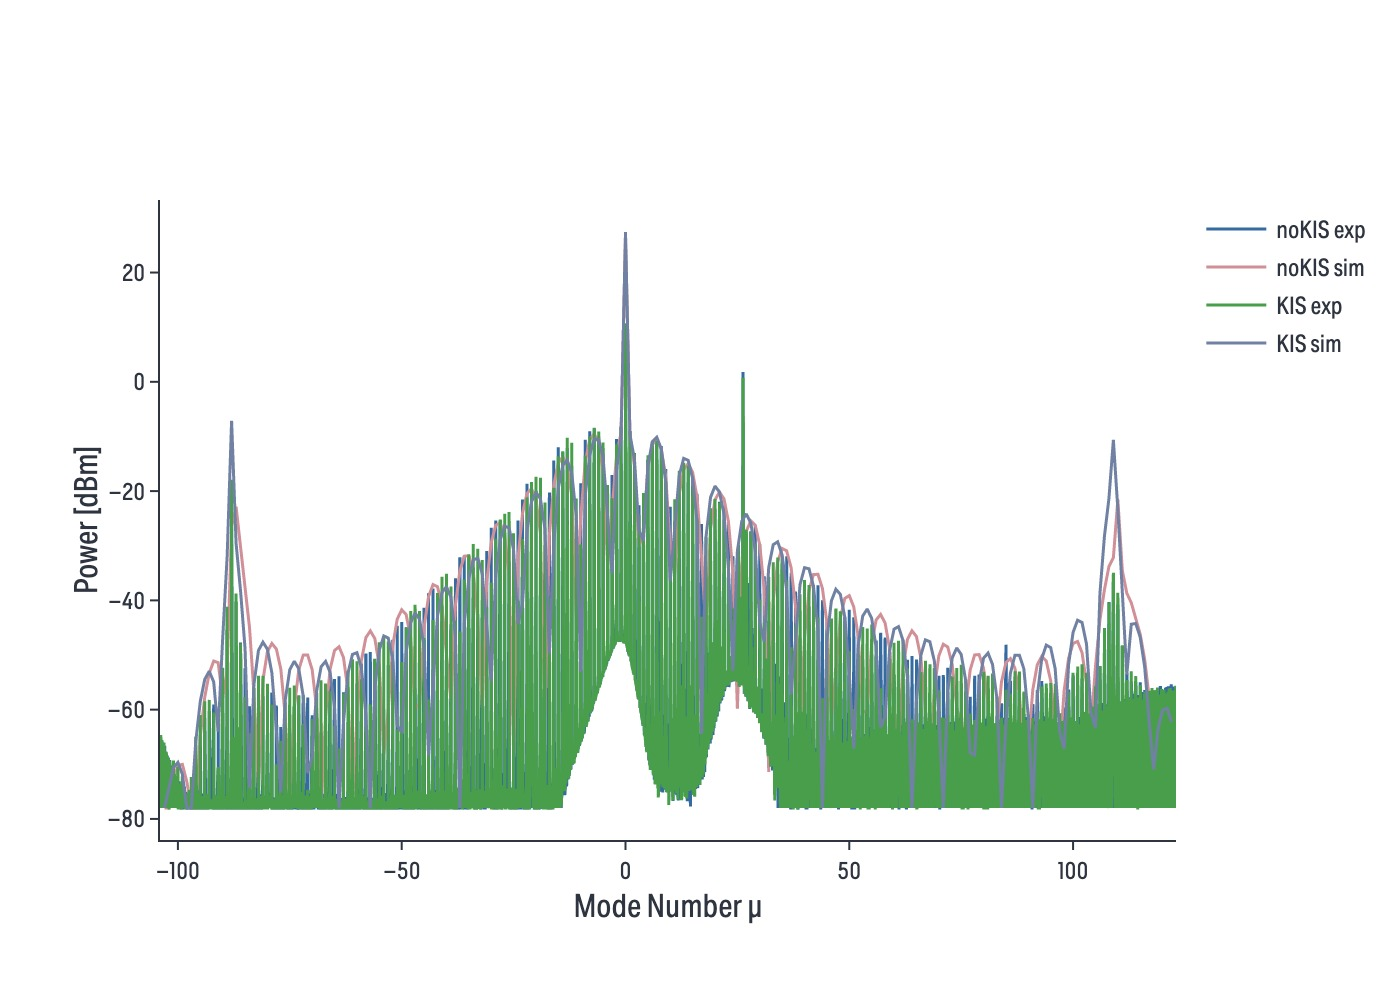

In [10]:
fig_firstshot.show()

Comparing them side by side, it is clear that we have improve the plot significantly.

# Saving the figure 

For the sake of display the figure has been scale by a **factor 2**, hence when saving the vector figure, the `scale = 0.5` parameter should be used. 
Additionally, it may be convenient to set the width and height of the figure accordingly to the final size of the figurein the publication: 
- 1 column: width = 250 px, height = 135 px (single subplots) [x2 since the 2 time scale for display]
- 2 column: width = 524.29 px px, height = 200 px (single subplots) [x2 since the 2 time scale for display

This way, the font size will all be consistent with all the figure of you paper (tick= 7 pt, label title = 8 pt, legend = 6 pt, axis linewidth = 0.5pt, plot line = 0.75 pt)

In [11]:
fig.update_layout(width=2 * 250.15, height=2 * 134, margin=dict(l=0, r=0, t=0, b=0))
fig.write_image("ExamplePlot.svg", scale=0.5)

However to save in png, to get a larger resolution, it is better to use a larger scale to avoid pixelization. All the element with remains at scale

In [12]:
fig.write_image("ExamplePlot.png", scale=5)